# VCHE Benchmark Analysis and Graphs For Lola -- 1000 runs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
#Dec 1 commit 663ff96223d7109b855d1eaae4a80a1022471ec5
# PN15 -- CLUSTER
lola_bench={'Type':"baseline",'PN':15,'LogT': 56,'Lbd': 0, 'Ecd': 9.53871E+07,'Enc': 1.54793E+09,'Eval': 1.29199E+10,            'PreVerif': 0          , 'Verif': 0          ,'Dec':2.66583E+08,  'Dcd': 6.72436E+07}
lola_V1   ={'Type':"REP"  ,   'PN':15,'LogT': 56,'Lbd': 64,'Ecd': 9.18861E+08,'Enc': 1.26440E+09,'Eval': 1.25504E+10,            'PreVerif': 0          , 'Verif': 1.29607E+08,'Dec':2.36222E+08,  'Dcd': 2.13692E+08}
lola_V1PRF={'Type':"REP PRF", 'PN':15,'LogT': 56,'Lbd': 64,'Ecd': 3.76865E+09,'Enc': 1.37070E+09,'Eval': 1.29229E+10,            'PreVerif': 1.55879E+09, 'Verif': 1.81068E+09,'Dec':3.48510E+08,  'Dcd': 2.07702E+08}
lola_V2   ={'Type':"PE"     , 'PN':15,'LogT': 56,'Lbd': 54,'Ecd': 1.81951E+09,'Enc': 2.84989E+09,'Eval': 5.16067E+10,            'PreVerif': 0          , 'Verif': 5.54070E+07,'Dec':1.68262E+09,  'Dcd': 8.84365E+08}
lola_V2PP ={'Type':"PE PP",   'PN':15,'LogT': 56,'Lbd': 54,'Ecd': 1.81951E+09,'Enc': 2.84989E+09,'Eval': 5.16067E+10+6.30750E+10,'PreVerif': 0,           'Verif': 5.54070E+07,'Dec':2*2.66583E+08,'Dcd': 7.63403E+08 -2*2.66583E+08}
timings={'Bench':lola_bench, 'REP':lola_V1, 'PE':lola_V2, 'PP':lola_V2PP}

In [3]:
pd.DataFrame(createDFDiffR(timings))

,,Ecd,Enc,Eval,Dec,Verif,Dcd
Create,REP,0.501105,0.000000,0.000000,0.000000,0.000000,0.000000
Eval.,REP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Verify,REP,0.000000,0.000000,0.000000,0.000000,0.388246,0.438696
Create,PE,1.049172,0.792276,0.000000,0.000000,0.000000,0.000000
Eval.,PE,0.000000,0.000000,2.994358,0.000000,0.000000,0.000000
Verify,PE,0.000000,0.000000,0.000000,4.241834,0.165975,2.447742
Eval.,PP,0.000000,0.000000,7.876361,0.000000,0.000000,0.000000
Verify,PP,0.000000,0.000000,0.000000,0.798567,0.165975,0.488258


In [4]:
pd.DataFrame(timings)

,Bench,REP,PE,PP
Type,baseline,REP,PE,PE PP
PN,15,15,15,15
LogT,56,56,56,56
Lbd,0,64,54,54
Ecd,95387100.0,918861000.0,1819510000.0,1819510000.0
Enc,1547930000.0,1264400000.0,2849890000.0,2849890000.0
Eval,12919900000.0,12550400000.0,51606700000.0,114681700000.0
PreVerif,0,0,0,0
Verif,0,129607000.0,55407000.0,55407000.0
Dec,266583000.0,236222000.0,1682620000.0,533166000.0


In [5]:
sns.set(font_scale=3)
#color = sns.color_palette("deep", 10) #["green", "Black", "Red", "Yellow", "peru", "Grey", "aqua"]
sns.set_palette(sns.cubehelix_palette(n_colors=7, start=0.8,rot=3,hue=1,gamma=1,dark=0.25,light=0.75))
sns.set_style("dark", {
   'axes.grid': True,
   'axes.edgecolor': 'none'
})
plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here


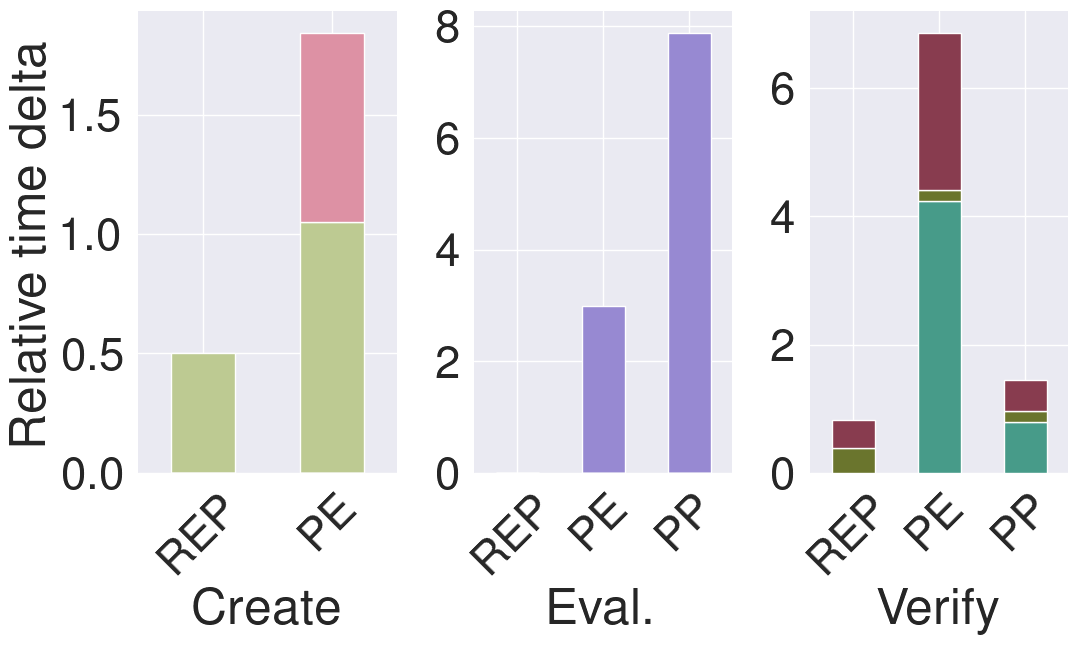

In [6]:
# Plot the barplot Relative DIFFERENCE with the baseline
timings_df = pd.DataFrame(createDFDiffR(timings))

n_subplots = len(timings_df.index.levels[0])
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=False, figsize=(12, 6))  # width, height
axes[0].set_ylabel('Relative time delta')

graph = dict(zip(timings_df.index.levels[0], axes[-n_subplots:]))
plots = list(map(lambda x: plot_function(x, graph[x], timings_df), graph))
fig.subplots_adjust(wspace=0.3)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Figures/barplotLola1000.pdf', bbox_inches='tight')
plt.show()